# This Notebook shows how the disaggregator works for the sectors CTS and industry

The disaggregator enables the user to generate DataFrames with:
- spatial data, by using functions from the `spatial` module
- temporal data, by using functions from the `temporal` module

## 1. General Settings and functions

In [50]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot
import matplotlib.pyplot as plt

#### Base year
- By setting the `base year` in the `config.yaml`, you define the year on which the spatial and temporal functions operate
- some functions are not affected, e. g. ``generate_specific_consumption_per_branch()`` because it makes use of particular publications from these years

#### Region Codes
Since different statistics and publications use different notations for region codes, we compiled a dictionary that can be used to transform the different codes.
- The function ``config.dict_region_code()`` returns a dictionary with conversions of different kinds of region denotation, if ``raw = False``
- the dictionary can convert between the following designations ``ags_lk``, ``id_ags``, ``id_ags_lk``, ``id_nuts3``, ``id_t_nuts3_lk``, ``name``, ``natcode_nuts3``

In [51]:
config.dict_region_code(raw=True).head()

,id_t_nuts3_lk,id_nuts3,natcode_nuts3,name,id_ags_lk,ags_lk,id_ags,ags_bl,bl
idx,,,,,,,,,
0,5,27600005,DEF05,Dithmarschen,5,1051,1051000,1,Schleswig-Holstein
1,6,27600006,DEF06,Herzogtum Lauenburg,6,1053,1053000,1,Schleswig-Holstein
2,312,27600314,DE278,Günzburg,314,9774,9774000,9,Bayern
3,7,27600007,DEF07,Nordfriesland,7,1054,1054000,1,Schleswig-Holstein
4,8,27600008,DEF08,Ostholstein,8,1055,1055000,1,Schleswig-Holstein


## 2. Spatial Functions

The spatial functions perform the task to calculate energy demand per district and branch. Therefore, a specific energy consumption in `MWh/employee` is calculated per branch and district using information from the database. The functions that perform this task are called `generate_specific_consumption_per_branch()` and `generate_specific_consumption_per_branch_and_district()`. Their ouput is also saved in the folder `data_in`.
Subsequently, the specific consumption is multiplied with the number of employees in each branch and district. This is done by the function `disagg_CTS_industry()`. This function also calls the aforementioned functions, if the folder `data_in` does not contain the respective output.

The function `spatial.disagg_CTS_industry()` requires at least two arguments:

1. ``source`` is the source of energy and must be one of ``['power', 'gas']``.  
2. ``sector`` is the sector whose energy consumption is to be disaggregated and must be one of ``['CTS', 'industry']``.


Additionally, you can use NUTS-3 codes instead of the AGS ('Amtlicher Gemeindeschlüssel'), through setting ``use_nuts3code=True``.

Also you can choose to disaggregate solely the 

    - electricity consumption obtained from the grid (when 'source' = 'power')
    - gas consumption without consumption for self-generation of electricity (when 'source' = 'gas')
by setting ``no_self_gen=True``.

The function returns a DataFrame with absolute gas or electricity consumption per branch and district for the sectors CTS or industry in **MWh** for the ``base year`` (see ``config.yaml``)
It uses files "../data_in/regional/specific_`source`_consumption.csv", with ``source`` being in [``power``, ``gas``], if file does not exist, the function ``generate_specific_consumption_per_branch_and_district()`` is called

Let's start with ``power`` for both ``CTS`` and ``industry``:

### 2.1 Electricity Consumption in [MWh/a]

In [52]:
ec_CTS = spatial.disagg_CTS_industry(sector='CTS', source='power', use_nuts3code=True)
ec_CTS.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
1,274.943,"1,226.670","1,903.454","3,616.562","31,089.747","13,827.439","25,146.741","18,505.802","41,981.733","14,550.847",...,"23,729.725","13,965.188","9,804.246","18,230.858","3,828.057","14,783.492","27,515.483","29,038.246","19,842.243","15,671.770"
2,0.000,49.168,53.716,0.000,18.451,958.966,7.959,83.558,66.980,429.727,...,19.694,286.623,272.268,105.847,"1,248.200",226.800,24.381,525.221,197.232,0.000
3,0.000,0.000,"1,067.677",0.000,"2,581.442",103.135,"4,552.725","1,032.577",351.641,704.030,...,0.000,36.176,92.679,0.000,0.000,435.477,145.469,328.547,0.000,0.000
36,0.000,"16,695.380",0.000,0.000,0.000,"8,082.601","3,452.086","5,760.577","10,353.289",0.000,...,"8,542.072","2,835.076","7,263.147","4,841.206","39,766.041","23,110.165","2,585.604","6,350.340","15,508.830","14,341.510"
37,"12,262.017","1,498.193",0.000,"7,717.556","2,119.106","18,487.516","8,014.385","2,286.292","10,937.280","3,389.730",...,"3,390.228",0.000,"2,882.641","5,639.752","2,698.325","2,523.047","1,400.109","2,520.360",0.000,"4,438.875"


In [53]:
ec_industry = spatial.disagg_CTS_industry(sector='industry', source='power', use_nuts3code=True)
ec_industry.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,"40,286.457",0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,"60,836.996",0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,720.695,0.000,876.510,"5,365.937",242.986,267.187,"1,676.887","1,233.835",299.382,...,968.218,164.277,"1,070.855",539.771,"1,962.387","3,992.714",112.582,"2,036.896",284.572,"3,602.190"
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,"5,898.870",0.000,0.000,420.430,"1,639.947"


Plot your result using functions from the plot module:

In [54]:
from matplotlib.colors import LinearSegmentedColormap
fe_cmap_colors = ['#D1DBD2', '#8DD0D2', '#007B87', '#683C5B', '#E83F35']
fe_cmap_nodes = [0.0, 0.25, 0.5, 0.75, 1.0]
cmap_fe = LinearSegmentedColormap.from_list("cmap_fe", list(zip(fe_cmap_nodes, fe_cmap_colors)))

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
disaggregator.plot: WARNING  list-handling is not yet supported by `cmap_handler`, returning as list!


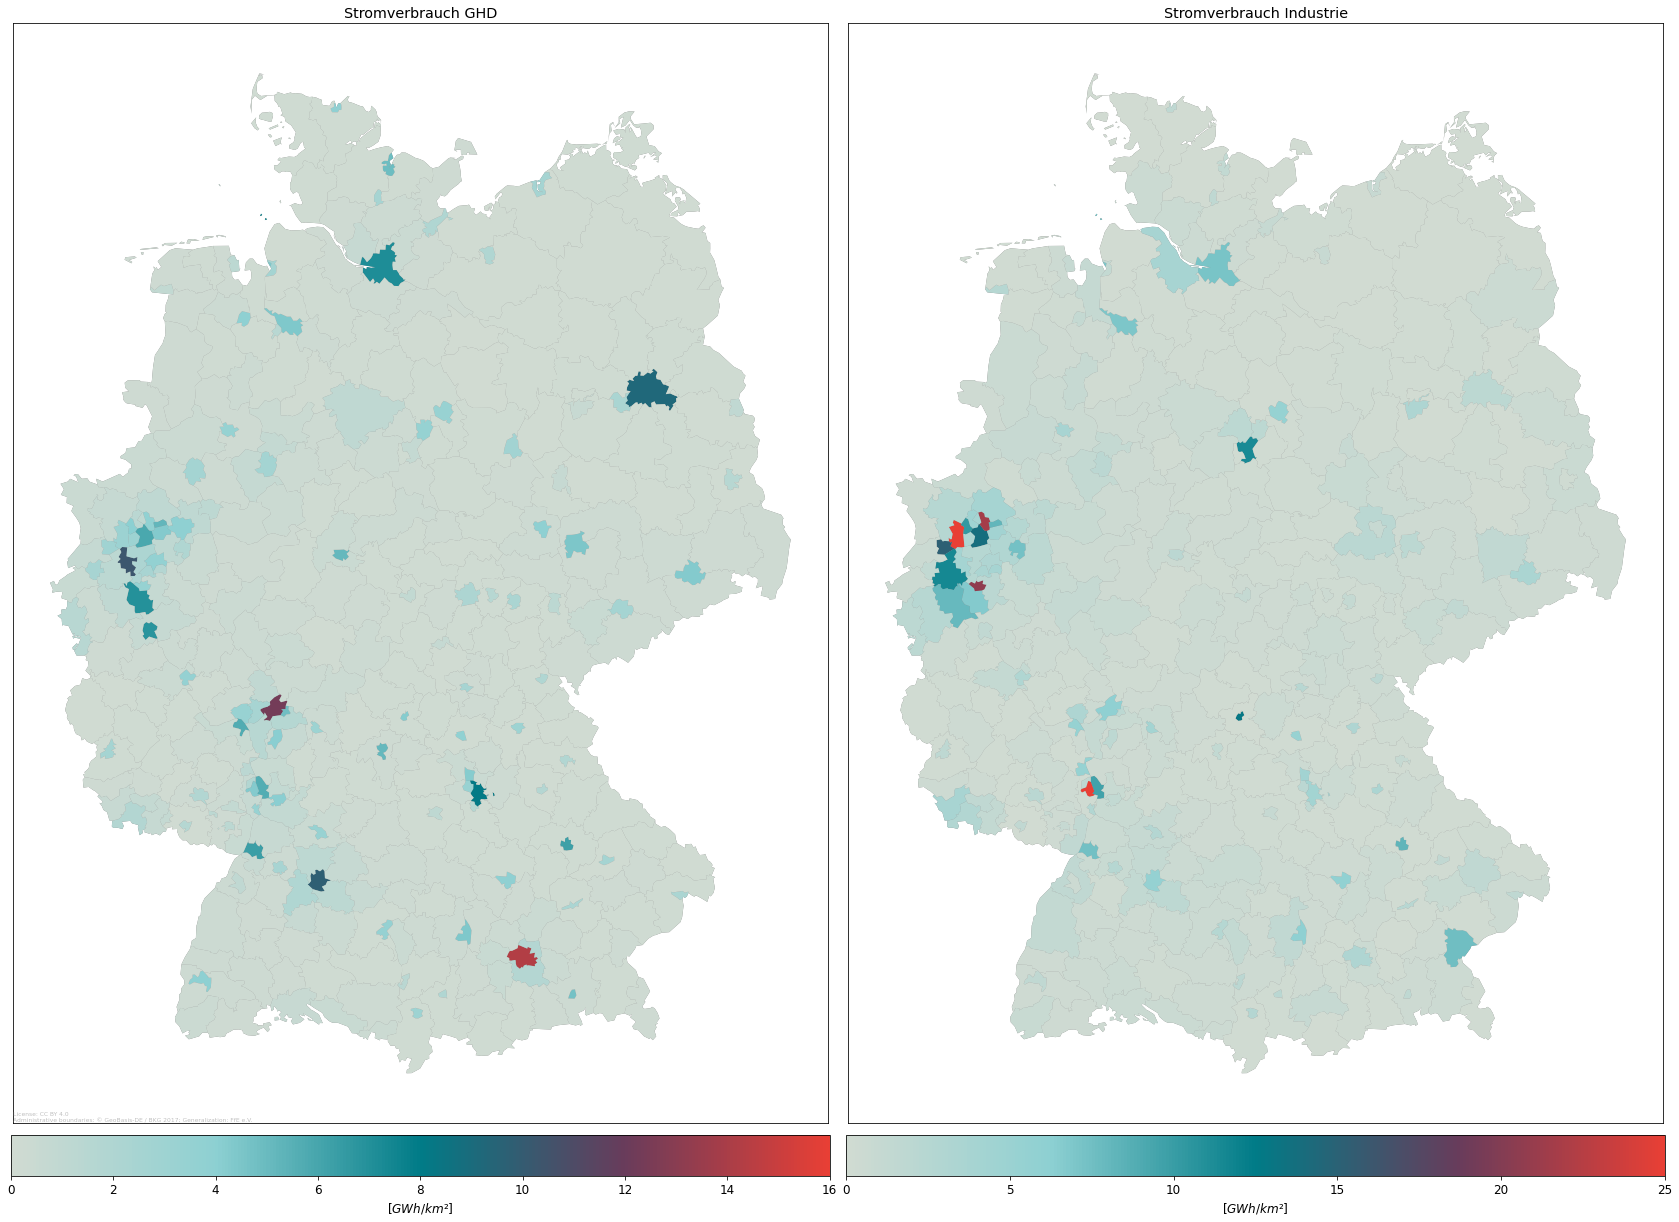

In [55]:
ec_combined = pd.concat([ec_CTS.sum()/1000, ec_industry.sum()/1000], keys=['GHD', 'Industrie'], axis=1, join='inner')
fig, ax = plot.choropleth_map(ec_combined, relative=True, unit='GWh', axtitle='Stromverbrauch', 
                              colorbar_each_subplot=True,  add_percentages=False, cmap=[cmap_fe, cmap_fe], interval=[(0, 16), (0, 25)])

Let's continue with ``gas`` for both ``CTS`` and ``industry``:

### 2.2 Gas Consumption in [MWh/a]


In [56]:
gc_CTS = spatial.disagg_CTS_industry(sector='CTS', source='gas', use_nuts3code=True)
gc_CTS.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
1,131.477,586.591,910.228,"1,729.432","14,867.050","6,612.251","12,025.117","8,849.434","20,075.574","6,958.184",...,"11,347.503","6,678.123","4,688.369","8,717.957","1,830.569","7,069.434","13,157.845","13,886.027","9,488.518","7,494.207"
2,0.000,0.079,0.086,0.000,0.030,1.540,0.013,0.134,0.108,0.690,...,0.032,0.460,0.437,0.170,2.004,0.364,0.039,0.843,0.317,0.000
3,0.000,0.000,0.160,0.000,0.387,0.015,0.682,0.155,0.053,0.105,...,0.000,0.005,0.014,0.000,0.000,0.065,0.022,0.049,0.000,0.000
36,0.000,15.393,0.000,0.000,0.000,7.452,3.183,5.311,9.546,0.000,...,7.876,2.614,6.697,4.464,36.664,21.307,2.384,5.855,14.299,13.223
37,43.088,5.265,0.000,27.119,7.446,64.964,28.162,8.034,38.433,11.911,...,11.913,0.000,10.129,19.818,9.482,8.866,4.920,8.856,0.000,15.598


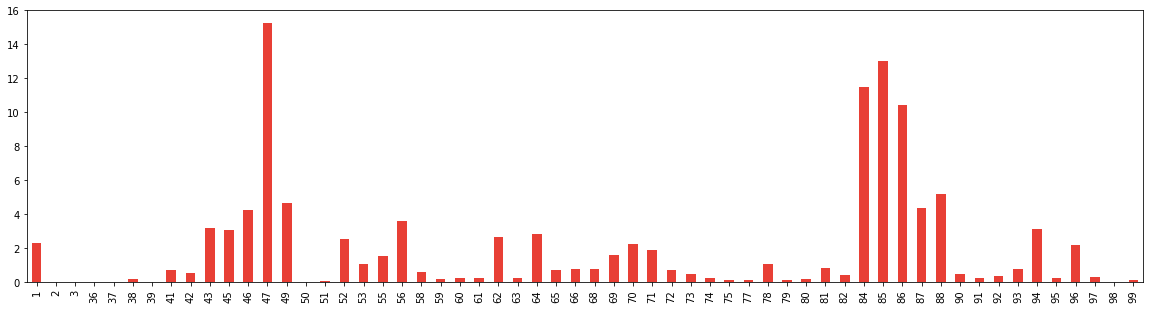

In [57]:
gc_CTS_sums = gc_CTS.sum(axis=1)/1e6
gc_CTS_sums.plot(kind='bar', figsize=(20, 5))

In [58]:
#gc_CTS_sums.index = 
dic = config.dict_wz(keys='WZ', values='Kurztitel')
gc_CTS_sums.index = [dic[i] for i in gc_CTS_sums.index]

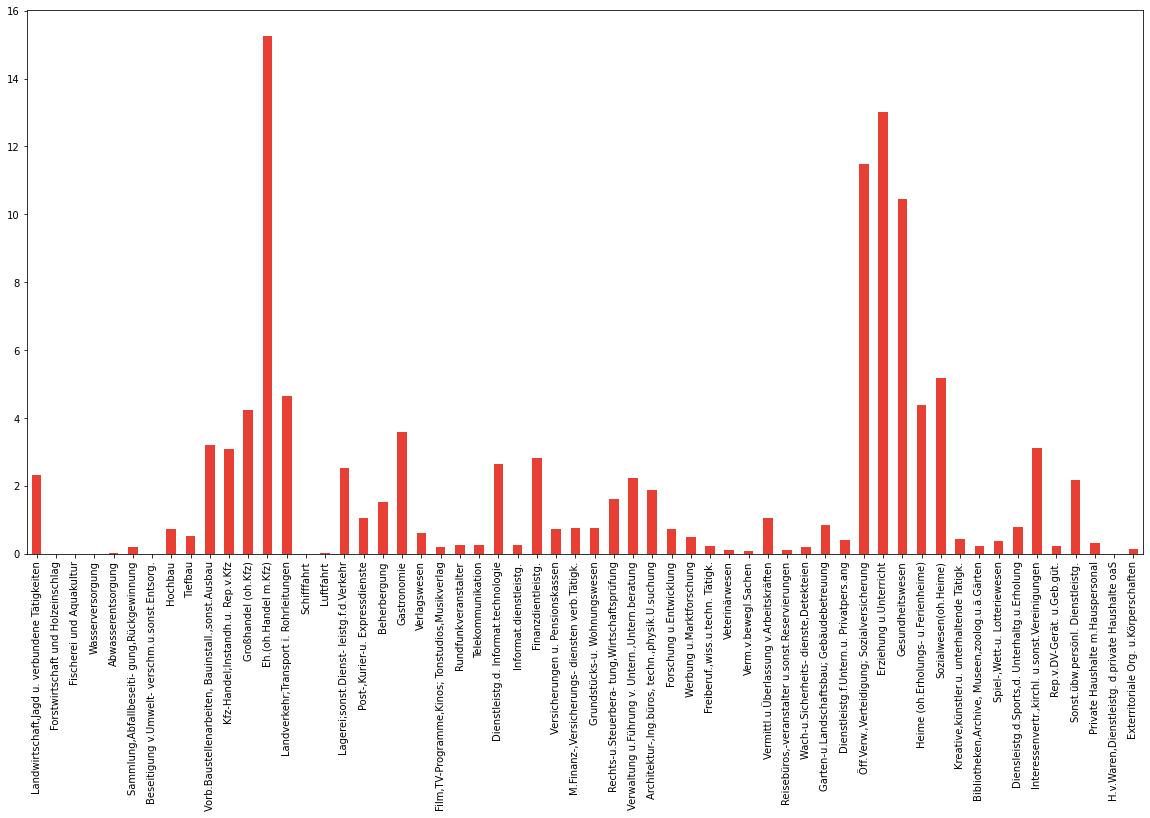

In [59]:
gc_CTS_sums.plot(kind='bar', figsize=(20, 10))

In [60]:
gc_industry = spatial.disagg_CTS_industry(sector='industry', source='gas', use_nuts3code=True)
gc_industry.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,"1,157.228",0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,"326,835.447",0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,505.632,0.000,921.982,"3,249.509",244.788,124.217,"1,237.261","1,219.016",139.185,...,378.859,85.862,419.020,211.209,"1,376.125",806.152,78.307,695.852,199.122,"1,409.518"
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,"1,408.669",0.000,0.000,294.184,641.702


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


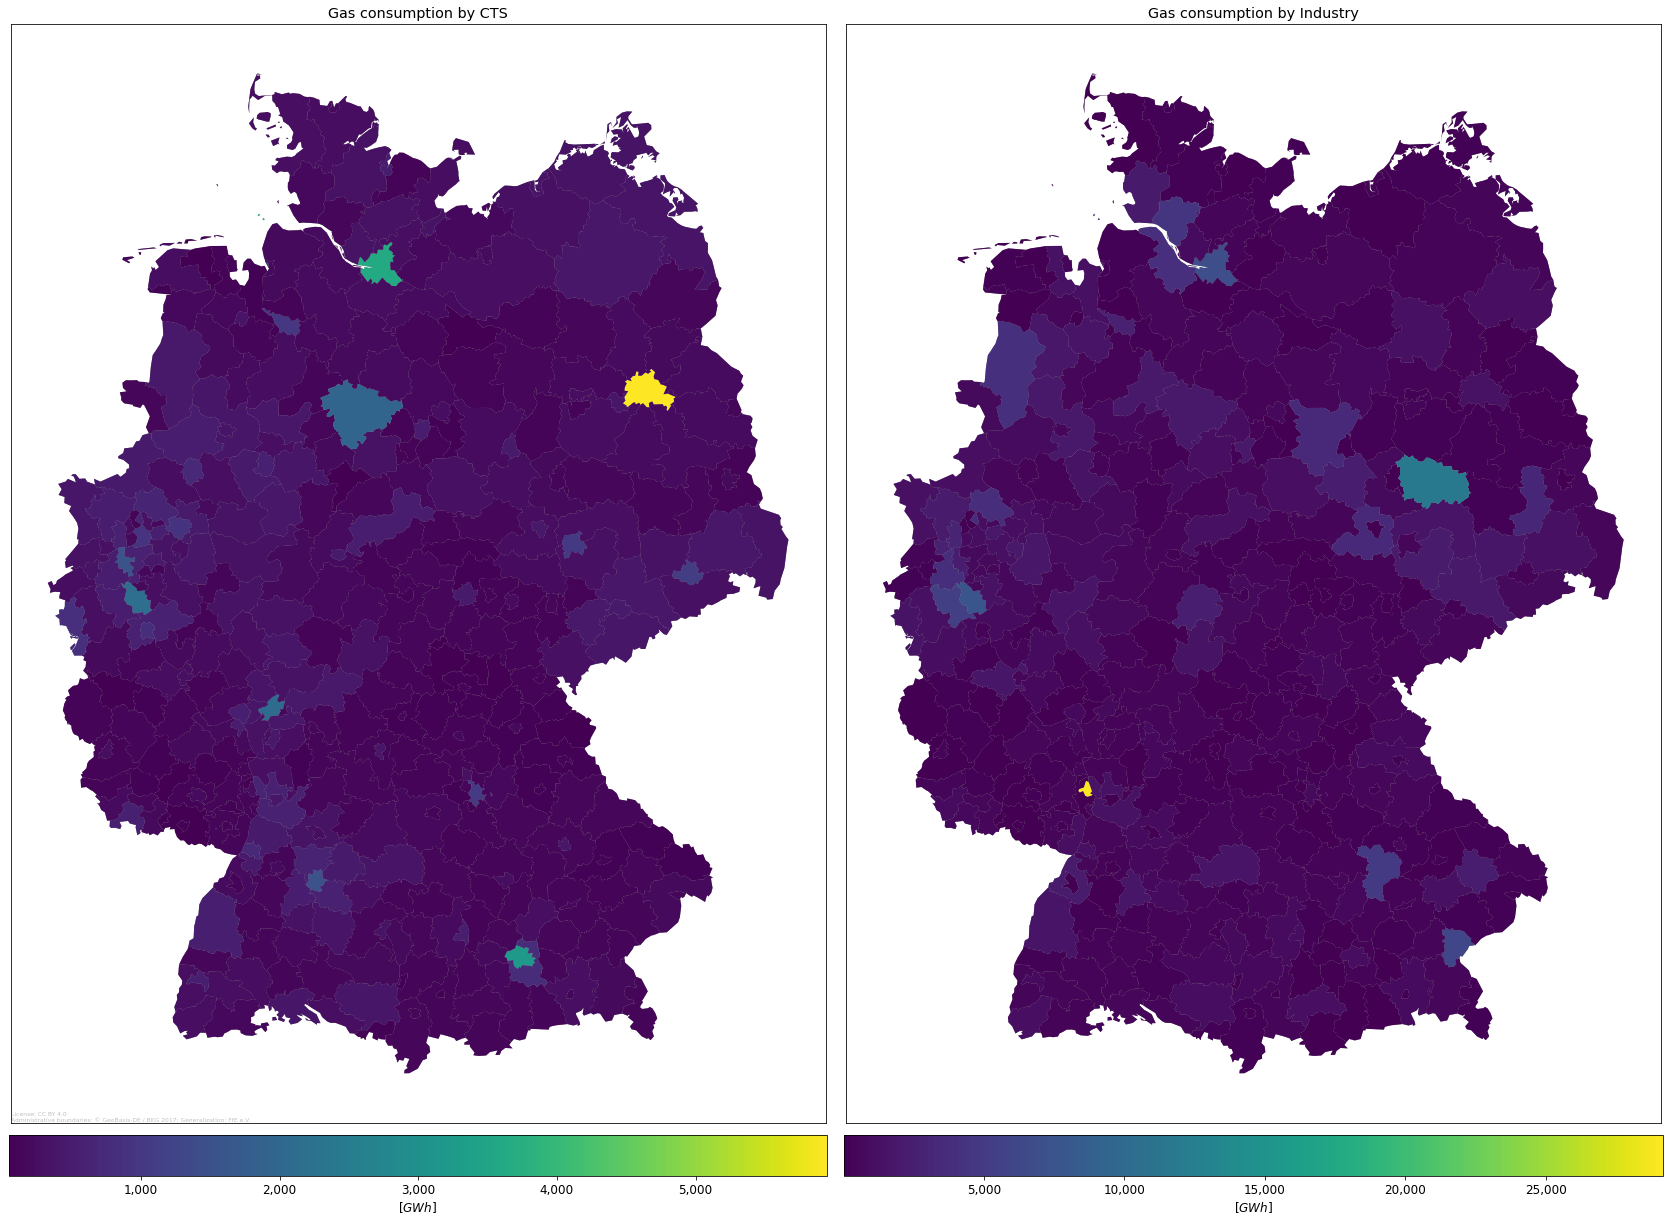

In [61]:
gc_combined = pd.concat([gc_CTS.sum()/1000, gc_industry.sum()/1000], keys=['CTS', 'Industry'], axis=1, join='inner')
fig, ax = plot.choropleth_map(gc_combined, relative=False, unit='GWh', axtitle='Gas consumption by', 
                              colorbar_each_subplot=True,  add_percentages=False)

Now save this figure e.g. as PDF file:

In [62]:
from disaggregator.config import data_out
fig.savefig(data_out('disagg_gas.pdf'), bbox_inches='tight')

### 2.3 Functions that work in the background

#### Function ``generate_specific_consumption_per_branch_and_district()``

The function `generate_specific_consumption_per_branch_and_district()` returns specific power and gas consumption per branch and district and requires at least two arguments:

1. ``iterations_power`` is the number of iterations for specific power consumption and must be a positiv integer (8 is recommended).  
2. ``iterations_gas`` is the number of iterations for specific gas consumption and must be a positiv integer (8 is recommended).


Additionally, you can choose to generate solely the specific electricity consumption obtained from the grid and the specific gas consumption without consumption for self-generation of electricity by setting ``no_self_gen=True``.

In [63]:
spec_ec_district, spec_gc_district = data.generate_specific_consumption_per_branch_and_district(8,8)

In [64]:
spec_ec_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,21.149,21.149,21.149,21.149,21.149,21.149,21.149,21.149,21.149,21.149,...,21.149,21.149,21.149,21.149,21.149,21.149,21.149,21.149,21.149,21.149
2,5.968,5.968,5.968,5.968,5.968,5.968,5.968,5.968,5.968,5.968,...,5.968,5.968,5.968,5.968,5.968,5.968,5.968,5.968,5.968,5.968
3,46.935,46.935,46.935,46.935,46.935,46.935,46.935,46.935,46.935,46.935,...,46.935,46.935,46.935,46.935,46.935,46.935,46.935,46.935,46.935,46.935
5,152.115,220.455,131.054,142.679,986.039,153.530,395.275,249.061,228.654,395.275,...,395.275,295.921,395.275,395.275,395.275,882.328,222.368,452.746,221.043,395.275
6,67.313,97.554,57.993,63.137,436.335,67.939,174.914,110.213,101.182,174.914,...,174.914,130.949,174.914,174.914,174.914,390.442,98.401,200.346,97.815,174.914


#### Function ``generate_specific_consumption_per_branch()``
This function is the basis for ``generate_specific_consumption_per_branch_and_district()`` and doesn't take any arguments. It returns multiple dataframes which you can see in the demonstation below.

The values are based on the publication [Umweltökonomische Gesamtrechnung, 2017](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/Publikationen/Umweltnutzung-Wirtschaft/umweltnutzung-und-wirtschaft-energie-pdf-5850014.html) for 2015, which is also available from the DemandRegio database (table_id = 71, with some industry branches (WZ) being grouped together and with ET = 12 for gas and ET = 18 for electricity)

In [65]:
[df_spez_ec, df_spez_gc, df_abs_consumption, df_emp, 
 df_f_sv_no_self_gen, df_f_gv_no_self_gen] = data.generate_specific_consumption_per_branch()

In [66]:
## specific electricity consumption for every branch
df_spez_ec.head()

,spez. SV
1,21.149
2,5.968
3,46.935
5,362.567
6,194.390


In [67]:
## absolute consumption as in "Umweltökonomischer Gesamtrechnung" for the year 2015, in Database dimension='spatial', table_id=71,
df_abs_consumption.head()

,value,WZ,ET
0,"2,323,170.368",1,12
1,"4,858,178.284",1,18
2,187.356,2,12
3,"116,674.705",2,18
4,17.467,3,12


In [68]:
## employees by branch and district
df_emp.head()

ags,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
WZ,,,,,,,,,,,,,,,,,,,,,
1,13.000,58.000,90.000,171.000,"1,470.000",653.795,"1,189.000",875.000,"1,985.000",688.000,...,"1,122.000",660.309,463.569,862.000,181.000,699.000,"1,301.000","1,373.000",938.190,741.000
2,0.000,8.238,9.000,0.000,3.091,160.673,1.334,14.000,11.222,72.000,...,3.300,48.023,45.618,17.735,209.134,38.000,4.085,88.000,33.046,0.000
3,0.000,0.000,22.748,0.000,55.000,2.197,97.000,22.000,7.492,15.000,...,0.000,0.771,1.975,0.000,0.000,9.278,3.099,7.000,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,101.920,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,139.427,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [69]:
# dataframes contain factors for calculating specific electricity consumption solely obtained from the grid
# and specific gas consumption without consumption for self-generation of electricity (this is needed when no_self_gen = True)
df_f_sv_no_self_gen.head()

1   1.000
2   1.000
3   1.000
5   0.853
6   0.804
Name: Strom Netzbezug, dtype: float64

In [70]:
df_f_gv_no_self_gen.head()

1   1.000
2   1.000
3   1.000
5   0.161
6   0.955
Name: f_GV_WZ_no_self_gen, dtype: float64

## 3. Temporal Functions

The temporal functions perform the task to calculate energy demand time series per district and branch. Therefore, the output from the `spatial` functions is needed. 

Furthermore, normalized load time series are generated for every branch and district. The CTS load time series for power and gas are standard load profiles, the industry time series represent typical working shifts in the respective branch, with a low load level for non-working hours and a high load level for working hours. 9 different load profiles have been defined for industry representing 1-, 2- and 3-shift operation on 5, 6 and 7 days per week. Important functions, that fulfill the tasks in the background are `shift_load_profile_generator()`, `CTS_power_slp_generator()` as well as `t_allo()`, `h_value()`, `gas_slp_weekday_params` and `disagg_daily_gas_slp`.

The results of these functions are brought together in 3 functions:
- `disagg_temporal_power_CTS()` for the results on CTS for power
- `disagg_temporal_gas_CTS()` for the results on CTS for gas
- `disagg_temporal_industry()` for the results on industry for gas and power

Each of these 3 function has a boolean argument `detailed` which is set on `False` by default. If `detailed` is put on `True` the function will return a multi-index-DataFrame() which contains a time series per branch AND district. If set on `False` it will only contain aggregated time series per district.

### 3.1 CTS electricity consumption [MWh/15min]
#### 3.1.1 Disaggregate using **standard load profiles**: Function ``disagg_temporal_power_CTS()``
- Disagreggate spatial data of CTS' **power** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- takes two optional arguments:
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions `disagg_CTS('power')` , `CTS_power_slp_generator` and information from `config.py`

In [71]:
df_CTS = temporal.disagg_temporal_power_CTS(detailed=False, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [72]:
df_CTS.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2015-01-01 00:00:00,3.059,8.243,5.939,2.685,3.594,3.616,5.351,5.050,6.512,2.121,...,1.808,1.233,2.305,1.915,1.843,2.710,2.020,2.003,2.371,2.144
2015-01-01 00:15:00,3.214,8.812,6.254,2.851,3.735,3.765,5.643,5.327,6.769,2.224,...,1.847,1.261,2.388,1.968,1.907,2.818,2.064,2.044,2.436,2.207
2015-01-01 00:30:00,3.129,8.549,6.075,2.771,3.630,3.673,5.425,5.131,6.580,2.148,...,1.803,1.229,2.331,1.918,1.881,2.753,2.012,1.987,2.383,2.160
2015-01-01 00:45:00,3.054,8.324,5.915,2.702,3.539,3.593,5.224,4.948,6.415,2.081,...,1.768,1.201,2.282,1.875,1.860,2.698,1.968,1.939,2.339,2.122
2015-01-01 01:00:00,2.998,8.159,5.792,2.649,3.470,3.533,5.054,4.792,6.289,2.026,...,1.743,1.181,2.248,1.843,1.849,2.658,1.935,1.903,2.309,2.095


In [73]:
# export your data using
df_CTS.to_csv(data_out('CTS_Power_2015_MWh.csv'))

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7C8824848>]],
       dtype=object))

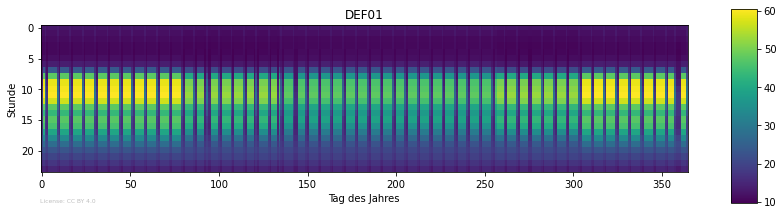

In [74]:
# or plot your data using
plot.heatmap_timeseries(df_CTS['DEF01'].resample('H').sum(), unit = 'MWh')

#### or use detailed version of the function

In [75]:
df_CTS_detail = temporal.disagg_temporal_power_CTS(detailed=True, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

MemoryError: Unable to allocate 6.07 GiB for an array with shape (23258, 35040) and data type float64

In [ ]:
# filter your results using multiindex
df_lk_DEF01 = df_CTS_detail.loc[:, 'DEF01']
df_lk_DEF01.head()

In [ ]:
# use DataFrame.reorder_levels to filter for CTS branches
df_wz_81 = df_CTS_detail.reorder_levels([1,0], axis=1).loc[:,81]
df_wz_81.head()

#### 3.1.2 Disaggregation of electricity consumption using **branch load profiles**: Function ``disagg_temporal_power_CTS_blp()``
- works similar as disaggregation with standard load profiles (SLP), however uses industry specific branch load profiles (BLP), which have been created using measured data
- covers 39 industries from CTS sector and 12 from industrial sector
- industries where no BLP is available will be disaggregated using SLP
- the function can be called using the same arguments as ``disagg_temporal_power_CTS()`` 

In [ ]:
df_CTS_blp = temporal.disagg_temporal_power_CTS_blp(year=2017, use_nuts3code=True)


In [ ]:
df_CTS_blp.head()

In [ ]:
plot.heatmap_timeseries(df_CTS_blp['DEF01'].resample('H').sum(), unit = 'MWh')

In [ ]:
# function can also be called using detaild=True to provide an output per nuts3-region and industry via multicolumn
df_CTS_blp_detailed = temporal.disagg_temporal_power_CTS_blp(year=2016, detailed=True, use_nuts3code=True)


### 3.2 CTS gas consumption [MWh/h]
#### Function disagg_temporal_gas_CTS()
- Disagreggate spatial data of CTS' **gas** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- takes two optional arguments:
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions like `disagg_daily_gas_slp(state)` and information from `config.py` and `./data_in/Gas Load Profiles/`

In [ ]:
# run function
df_CTS_gas = temporal.disagg_temporal_gas_CTS(detailed=False, use_nuts3code=False)
df_CTS_gas.head()

In [ ]:
# export your data using
df_CTS_gas.to_csv(data_out('CTS_Power_2015_MWh.csv'))

In [ ]:
# or plot your data using
plot.heatmap_timeseries(df_CTS_gas['1001'], unit = 'MWh')

In [ ]:
# plot your data
df_CTS_gas[["1001", "1002"]].plot(figsize=(12,6), ylim = 0)

### 3.3 Industry electricity consumption [MWh/15min]
#### 3.3.1 Disaggregation of electricity consumption using **shift load profiles**: Function ``disagg_temporal_industry()``
- Disagreggate spatial data of industry **power** and **gas** demand per quarter-hour for all districts in **MWh**
- returns DataFrame with districts as columns and timesteps as rows
- requires at least two arguments:
    - ``source`` which is the source of energy and must be one of ``['power','gas']``
    - ``low`` is the low load level for non-working hours and must be a float between ``[0,1]`` (default is 0.35, meaning that the lower level is 35% of the higher level)
- takes three optional arguments:
    - if ``no_self_gen = True`` then only electricity consumption obtained from the grid (for 'source' = 'power') and only gas consumption without gas consumption for self-generation of electricity (for 'source' = 'gas') will be disaggregated
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions like `shift_load_profile_generator()`, `disagg_CTS_industry()` and information from `config.py`


Let's start with industrial power consumption and compare consumption with and without self generation:

In [ ]:
df_ec_industry_no_self_gen = temporal.disagg_temporal_industry(source='power', no_self_gen=True,
                                                               detailed=False, use_nuts3code=False)

In [ ]:
df_ec_industry_no_self_gen.head()

In [ ]:
df_ec_industry = temporal.disagg_temporal_industry(source='power', no_self_gen=False, detailed=False, 
                                                   use_nuts3code=False, low=0.35)

In [ ]:
df_ec_industry.head()

In [ ]:
ec_industry_combined = pd.concat([df_ec_industry.sum(axis=1), df_ec_industry_no_self_gen.sum(axis=1)], 
                                 keys=['industry', 'industry without self-generation'], 
                                 axis=1, join='inner')
ec_industry_combined.head()

In [ ]:
fig, ax = plt.subplots(figsize = [12,6])
ec_industry_combined['industry'].head(800).plot(ax=ax)
ec_industry_combined['industry without self-generation'].head(800).plot(ax=ax)
plot.set_ax_format(ax=ax, ylabel='[MWh]', xlabel='Date',
                   axtitle='Power Consumption of Industry in Germany with and without self generation')

#### 3.1.2 Disaggregation of electricity consumption using **branch load profiles**: Function ``disagg_temporal_power_industry_blp()``
- works similar as disaggregation with shift load profiles, however uses industry specific branch load profiles (BLP), which have been created using measured data
- can only be applied to the electricity consumtion, so ``source = 'power'`` has to be set 
- covers 39 industries from CTS sector and 12 from industrial sector
- industries where no BLP is available will be disaggregated using SLP
- the function can be called using the same arguments as ``disagg_temporal_power_CTS()``

In [ ]:
df_industry_blp_detailed = temporal.disagg_temporal_industry_blp(year=2016, detailed=True, use_nuts3code=True)


In [ ]:
df_industry_blp_detailed.head()

### 3.2 Industry gas consumption
- uses the same function ``disagg_temporal_industry()`` but with argument ``source='gas'``
- works similar as temporal disaggregation for electricity
- uses **shift load profiles**, branch load profiles are not available for gas consumption
- example shows disaggregation with argument ``low=0.2``

In [ ]:
df_gas_industry_no_self_gen = temporal.disagg_temporal_industry(source='gas', no_self_gen=True, 
                                                                detailed=False, use_nuts3code=False, low=0.2)

In [ ]:
df_gas_industry_no_self_gen.head()

In [ ]:
df_gas_industry = temporal.disagg_temporal_industry(source='gas', detailed=False, use_nuts3code=False, low=0.2)

In [ ]:
df_gas_industry.head()

In [ ]:
gc_industry_combined = pd.concat([df_gas_industry.sum(axis=1), df_gas_industry_no_self_gen.sum(axis=1)], 
                                 keys=['industry', 'industry without self-generation'], 
                                 axis=1, join='inner')
gc_industry_combined.head()

In [ ]:
fig, ax = plt.subplots(figsize = [12,6])
ec_industry_combined['industry'].head(800).plot(ax=ax)
ec_industry_combined['industry without self-generation'].head(800).plot(ax=ax)
plot.set_ax_format(ax=ax, ylabel='[MWh]', xlabel='Date',
                   axtitle='Gas Consumption of Industry in Germany with and without self generation')

In [ ]:
# export your data using
# df_gas_industry.to_csv(data_out('Industry_Gas_2015_MWh.csv'))

In [ ]:
plot.heatmap_timeseries(df_gas_industry[1001].resample('H').sum(), unit = 'MWh')

In [ ]:
df_gas_industry.loc[:,[1001, 1002]].head(672).plot(figsize=(12,6))